Original Data:
   customer_id   age  income  spending        city
0            1  25.0    5000       200       Cairo
1            2  30.0    6000       250  Alexandria
2            3  35.0    5500       180       Cairo
3            4  40.0    7000       300        Giza
4            5   NaN    8000       350  Alexandria

Cleaned Data:
   customer_id        age  income  spending        city
0            1  25.000000    5000       200       Cairo
1            2  30.000000    6000       250  Alexandria
2            3  35.000000    5500       180       Cairo
3            4  40.000000    7000       300        Giza
4            5  47.777778    8000       350  Alexandria

Data After Feature Selection:
   customer_id        age  income  spending        city
0            1  25.000000    5000       200       Cairo
1            2  30.000000    6000       250  Alexandria
2            3  35.000000    5500       180       Cairo
3            4  40.000000    7000       300        Giza
4            5  4

C:\Users\minna\AppData\Local\Temp\ipykernel_9424\3454974892.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_customers['age'].fillna(df_customers['age'].mean(), inplace=True)


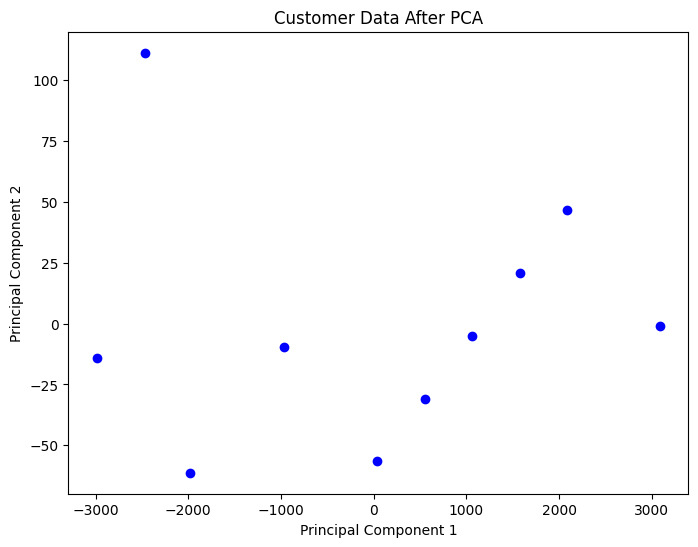

In [1]:
#Import the required libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt

# 1. Data Loading (Creating sample data)
# Customer data with some missing values
data_customers = {
    'customer_id': range(1, 11),
    'age': [25, 30, 35, 40, np.nan, 50, 55, 60, 65, 70],
    'income': [5000, 6000, 5500, 7000, 8000, 8500, 9000, 9500, 10000, 11000],
    'spending': [200, 250, 180, 300, 350, 400, 450, 500, 550, 600],
    'city': ['Cairo', 'Alexandria', 'Cairo', 'Giza', 'Alexandria', 'Cairo', 'Giza', 'Cairo', 'Alexandria', 'Giza']
}

# Convert the data into a DataFrame
df_customers = pd.DataFrame(data_customers)

# Display the first 5 rows of the data
print("Original Data:")
print(df_customers.head())

# 2. Data Cleaning: Handling Missing Values (NaN)
# Replacing missing values in "age" with the mean value
df_customers['age'].fillna(df_customers['age'].mean(), inplace=True)

# Removing duplicate customers (in case there are any duplicate entries)
df_customers.drop_duplicates(subset=['customer_id'], keep='first', inplace=True)

# Display the cleaned data
print("\nCleaned Data:")
print(df_customers.head())

# 3. Feature Selection: Selecting only the relevant columns
df_selected = df_customers[['customer_id', 'age', 'income', 'spending', 'city']]
print("\nData After Feature Selection:")
print(df_selected.head())

# 4. One-Hot Encoding: Encoding categorical data (city column)
df_encoded = pd.get_dummies(df_selected, columns=['city'], drop_first=True)

# Display the data after encoding
print("\nData After One-Hot Encoding:")
print(df_encoded.head())

# 5. Merging Data: Simulating a merge with another dataset (e.g., `df_orders`)
# Let's assume we have another DataFrame containing customer orders
data_orders = {
    'customer_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'order_id': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    'order_total': [500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400]
}
df_orders = pd.DataFrame(data_orders)

# Merging the customer data with the order data on 'customer_id'
df_merged = pd.merge(df_encoded, df_orders, on='customer_id',how='outer')

# Display the merged data
print("\nMerged Data:")
print(df_merged.head())

# 6. Dimensionality Reduction using PCA
# Reducing the data from 3 dimensions (age, income, spending) to 2 dimensions (PCA1 and PCA2)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_merged[['age', 'income', 'spending', 'order_total']])

# Adding the reduced PCA components to the DataFrame
df_merged['PCA1'] = reduced_data[:, 0]
df_merged['PCA2'] = reduced_data[:, 1]

# Display the data after applying PCA
print("\nData After PCA:")
print(df_merged.head())

# 7. Data Transformation: Standardizing the data using StandardScaler
scaler = StandardScaler()
df_merged[['age', 'income', 'spending', 'order_total']] = scaler.fit_transform(df_merged[['age', 'income', 'spending', 'order_total']])

# Display the standardized data
print("\nData After Standardization:")
print(df_merged.head())

# Visualizing the data after dimensionality reduction using PCA
plt.figure(figsize=(8, 6))
plt.scatter(df_merged['PCA1'], df_merged['PCA2'], color='blue')
plt.title('Customer Data After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.grid(True)
plt.show()

# Conclusion:
# The data is now ready for analysis or modeling.

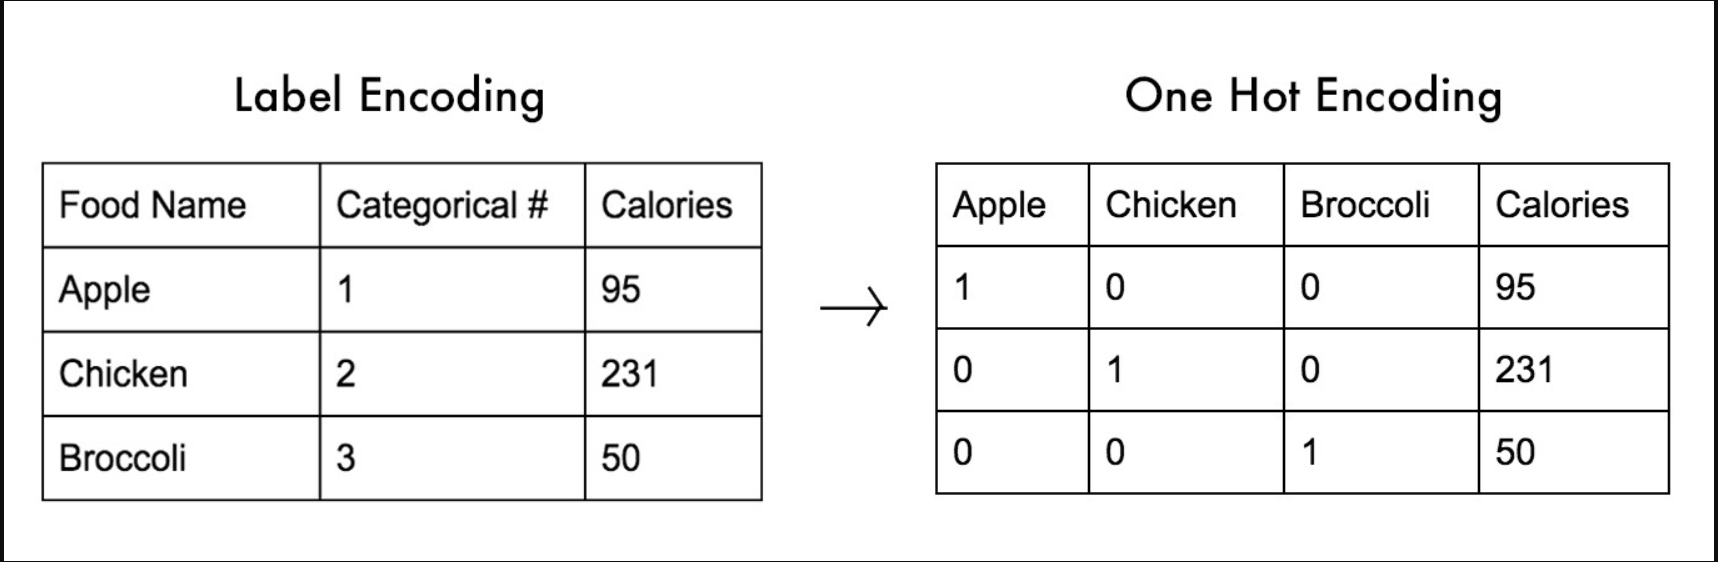